In [25]:
import subprocess
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pandas as pd
from IPython.display import display

In [26]:
def AnalyseGEN(plot_name, files, expected_results, iterations=10, populationSize=10):
    # SYMULOWANE WYŻARZANIE
    actual_results = []
    error = []
    
    index = 0
    for f in files:
        print("starting", f)
        
        p1 = subprocess.Popen(
            ["../Debug/PEA_Projekt.exe", "GEN", "../Debug/Data/"+f+".txt", str(iterations), str(populationSize), str(0)],
            stdout=subprocess.PIPE)
        
        single_result = float(p1.communicate()[0].strip())
        actual_results.append(single_result)
        
        index+=1
    
    resultTable = pd.DataFrame(
        {'baseFile' : files,
         'actual_results': actual_results,
         'expected_results': expected_results,
         'error': [str((abs(expected_results[x] - actual_results[x])) / expected_results[x] * 100) + "%" for x in range(len(actual_results))]
        })
    
    plt.rcParams['figure.figsize'] = [20, 5]
    fig, axes = plt.subplots()
    
    ind = np.arange(len(expected_results))
    width = 0.4   

    plt.bar(ind, expected_results, width, label='Wartosci globalnie minimalne')
    plt.bar(ind + width, actual_results, width,
        label='Wartosci obliczone przez algorytm')

    plt.ylabel('Wagi scieżek')
    plt.title(plot_name)

    plt.xticks(ind + width / 2, files)
    plt.legend(loc='best')
    
    plt.show()
    
    return resultTable

In [27]:
files = ["TSP/data17", "TSP/data21", "TSP/data24", "TSP/data26", "TSP/data29", "TSP/data42", "TSP/data58", "TSP/data120"]
expected_results = [2085, 2707, 1272, 937, 1610, 699, 25395, 6942]

starting TSP/data17
starting TSP/data21
starting TSP/data24
starting TSP/data26
starting TSP/data29
starting TSP/data42
starting TSP/data58
starting TSP/data120


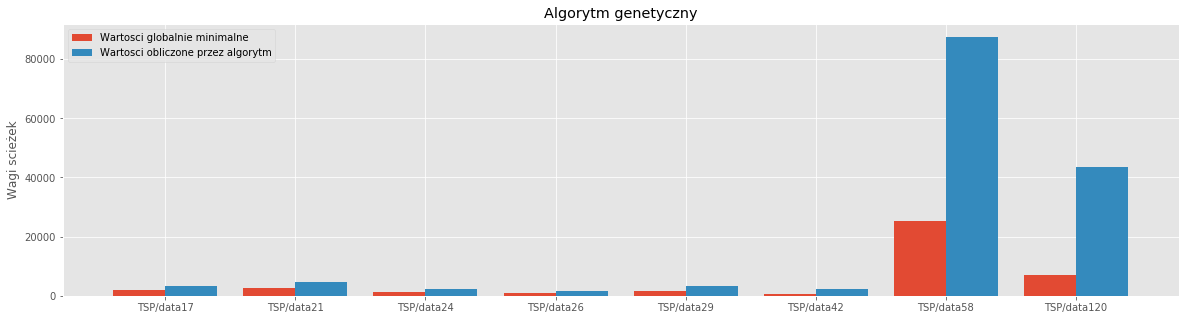

,baseFile,actual_results,expected_results,error
0,TSP/data17,3243.0,2085,55.539568345323744%
1,TSP/data21,4699.0,2707,73.5869966752863%
2,TSP/data24,2421.0,1272,90.33018867924528%
3,TSP/data26,1763.0,937,88.15368196371398%
4,TSP/data29,3349.0,1610,108.01242236024844%
5,TSP/data42,2296.0,699,228.4692417739628%
6,TSP/data58,87502.0,25395,244.5638905296318%
7,TSP/data120,43390.0,6942,525.0360126764621%


In [28]:
display(AnalyseGEN("Algorytm genetyczny", files, expected_results, iterations=10, populationSize=10))

starting TSP/data17
starting TSP/data21
starting TSP/data24
starting TSP/data26
starting TSP/data29
starting TSP/data42
starting TSP/data58
starting TSP/data120


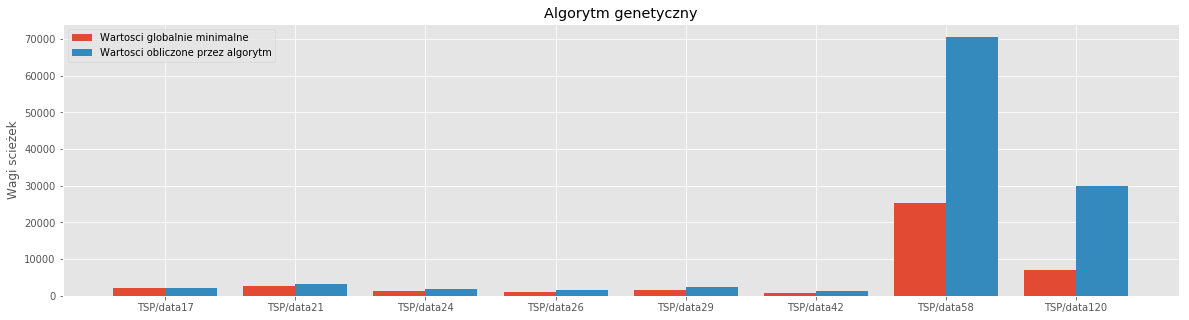

,baseFile,actual_results,expected_results,error
0,TSP/data17,2223.0,2085,6.618705035971223%
1,TSP/data21,3321.0,2707,22.6819357222017%
2,TSP/data24,1947.0,1272,53.06603773584906%
3,TSP/data26,1474.0,937,57.31056563500534%
4,TSP/data29,2474.0,1610,53.66459627329192%
5,TSP/data42,1425.0,699,103.862660944206%
6,TSP/data58,70569.0,25395,177.8854105138807%
7,TSP/data120,29815.0,6942,329.48717948717945%


In [29]:
display(AnalyseGEN("Algorytm genetyczny", files, expected_results, iterations=100, populationSize=10))

starting TSP/data17
starting TSP/data21
starting TSP/data24
starting TSP/data26
starting TSP/data29
starting TSP/data42
starting TSP/data58
starting TSP/data120


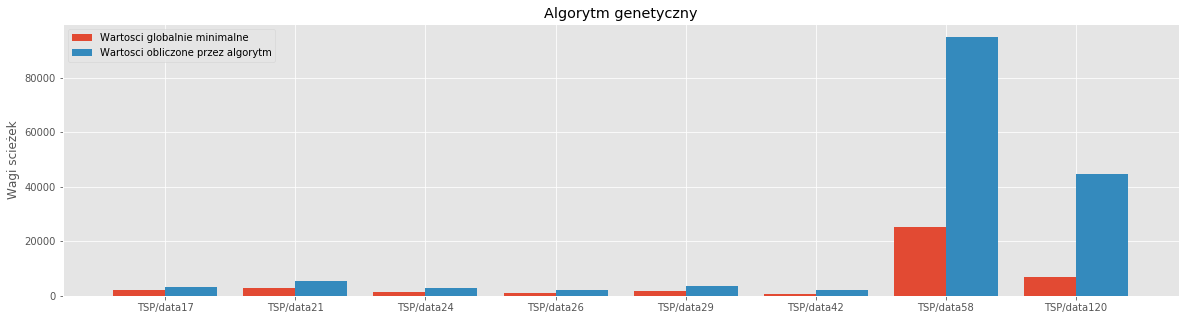

,baseFile,actual_results,expected_results,error
0,TSP/data17,3281.0,2085,57.362110311750605%
1,TSP/data21,5395.0,2707,99.29811599556704%
2,TSP/data24,2778.0,1272,118.39622641509433%
3,TSP/data26,1962.0,937,109.39167556029884%
4,TSP/data29,3699.0,1610,129.75155279503105%
5,TSP/data42,2279.0,699,226.0371959942775%
6,TSP/data58,94964.0,25395,273.94762748572555%
7,TSP/data120,44801.0,6942,545.3615672716796%


In [30]:
display(AnalyseGEN("Algorytm genetyczny", files, expected_results, iterations=10, populationSize=100))

starting TSP/data17
starting TSP/data21
starting TSP/data24
starting TSP/data26
starting TSP/data29
starting TSP/data42
starting TSP/data58
starting TSP/data120


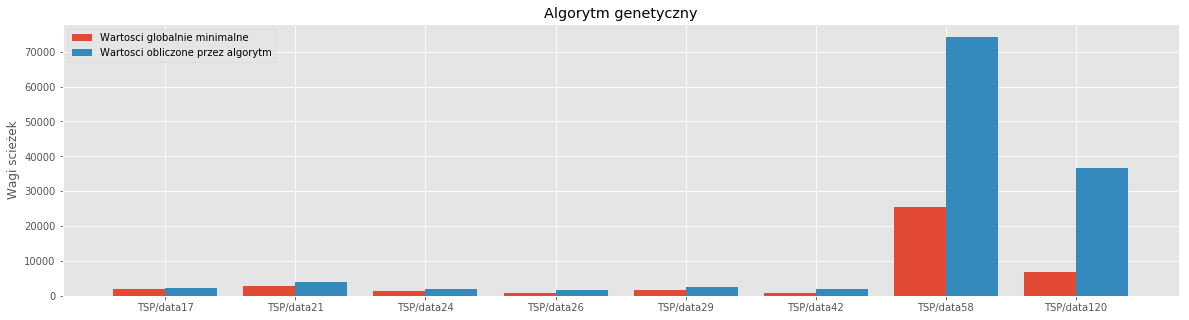

,baseFile,actual_results,expected_results,error
0,TSP/data17,2340.0,2085,12.23021582733813%
1,TSP/data21,3820.0,2707,41.11562615441448%
2,TSP/data24,1994.0,1272,56.76100628930818%
3,TSP/data26,1549.0,937,65.31483457844183%
4,TSP/data29,2506.0,1610,55.65217391304348%
5,TSP/data42,1928.0,699,175.82260371959944%
6,TSP/data58,74247.0,25395,192.36857649143533%
7,TSP/data120,36747.0,6942,429.343128781331%


In [31]:
display(AnalyseGEN("Algorytm genetyczny", files, expected_results, iterations=100, populationSize=100))